{'baseRate': 0.1,
 'parameters': {'awardAmount': 50,
  'baseRate': 0.1,
  'fprMutationMagnitude': 0.01,
  'fprMutationRate': 0.25,
  'nIterations': 1000000,
  'nTrials': 3},
 'policy': 'PUBLICATIONS',
 'syncEvery': 2000}

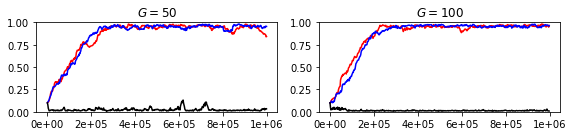

In [6]:
import warnings
warnings.simplefilter('ignore')

import sys
sys.path.append('..')
from vis import plot_award_experiment

jsons, fpr_dict = plot_award_experiment(experiment_dir='../awardAmounts')
jsons[0]['metadata']

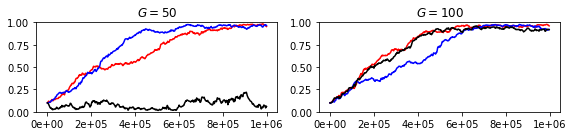

In [7]:
from vis import plot_award_experiment

plot_award_experiment(experiment_dir='../awardAmounts?MuRate=0.1&initFPR=0.1/');

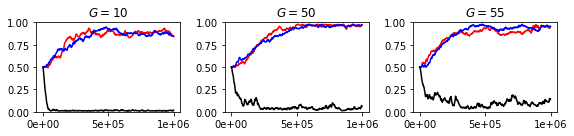

In [14]:
from vis import plot_award_experiment

ret = plot_award_experiment(
    experiment_dir='../awardAmounts?MuRate=0.1&initFPR=0.5',
low_funding=10, high_funding=55)

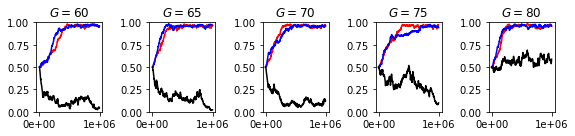

In [15]:
from vis import plot_award_experiment

plot_award_experiment(
    experiment_dir='../awardAmounts?MuRate=0.1&initFPR=0.5',
low_funding=60, high_funding=80);

In [ ]:
plot_award_experiment(
    experiment_dir='../awardAmounts?MuRate=0.1&initFPR=0.5',
low_funding=85, high_funding=200);

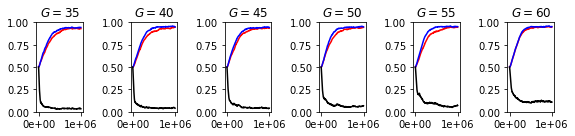

In [16]:
plot_award_experiment(
    experiment_dir='../fundingExperiment/',
low_funding=35, high_funding=60);

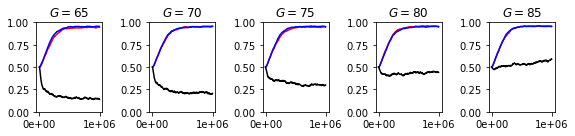

In [17]:
plot_award_experiment(
    experiment_dir='../fundingExperiment/',
low_funding=65, high_funding=85);

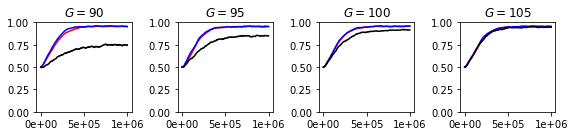

In [18]:
plot_award_experiment(
    experiment_dir='../fundingExperiment/',
low_funding=90, high_funding=105);

Loading mean and stddev dictionaries from .alpha_v_G_sync.pickle


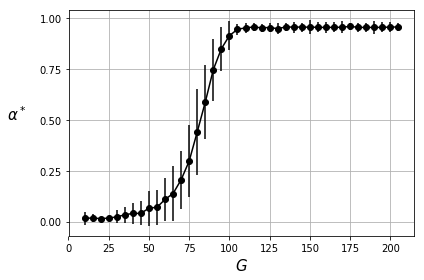

In [19]:
from vis import alpha_v_G
import os

# os.remove('.alpha_v_G_sync.pickle')  # <--sync file for alpha_v_G data inputs

alpha_v_G(low_funding=10, high_funding=205, experiment_dir='../fundingExperiment/', save_path='alpha_v_G.pdf')